In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Decision_Tree.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.drop(['PassengerId','Name','Ticket','Cabin', 'Embarked'], axis = 1, inplace = True)

In [6]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [7]:
df.Age = df.Age.fillna(np.mean(df.Age))

In [8]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [10]:
dummies = pd.get_dummies(df.Sex)

In [13]:
df1 = pd.concat([df,dummies], axis =1)

In [14]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,female,male
0,0,3,male,22.0,1,0,7.2500,0,1
1,1,1,female,38.0,1,0,71.2833,1,0
2,1,3,female,26.0,0,0,7.9250,1,0
3,1,1,female,35.0,1,0,53.1000,1,0
4,0,3,male,35.0,0,0,8.0500,0,1


In [15]:
df1.drop(['male','Sex'], axis =1, inplace = True)

In [16]:
x = df1.drop('Survived', axis = 1)

In [17]:
y  = df1.Survived

In [18]:
from sklearn.model_selection import train_test_split 
x_tr,x_te,y_tr,y_te = train_test_split(x,y, test_size = 0.3)

In [19]:
x_tr

,Pclass,Age,SibSp,Parch,Fare,female
423,3,28.0,1,1,14.4000,1
787,3,8.0,4,1,29.1250,0
302,3,19.0,0,0,0.0000,0
99,2,34.0,1,0,26.0000,0
399,2,28.0,0,0,12.6500,1
...,...,...,...,...,...,...
657,3,32.0,1,1,15.5000,1
446,2,13.0,0,1,19.5000,1
690,1,31.0,1,0,57.0000,0
539,1,22.0,0,2,49.5000,1


In [29]:
x_tr.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female'], dtype='object')

In [20]:
y_tr

423    0
787    0
302    0
99     0
399    1
      ..
657    0
446    1
690    1
539    1
571    1
Name: Survived, Length: 623, dtype: int64

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtree = DecisionTreeClassifier(criterion = 'gini').fit(x_tr, y_tr)

In [23]:
y_pred = dtree.predict(x_te)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
confusion_matrix(y_te, y_pred)

array([[138,  41],
       [ 25,  64]], dtype=int64)

In [26]:
accuracy_score(y_te,y_pred)

0.753731343283582

In [27]:
from sklearn import tree

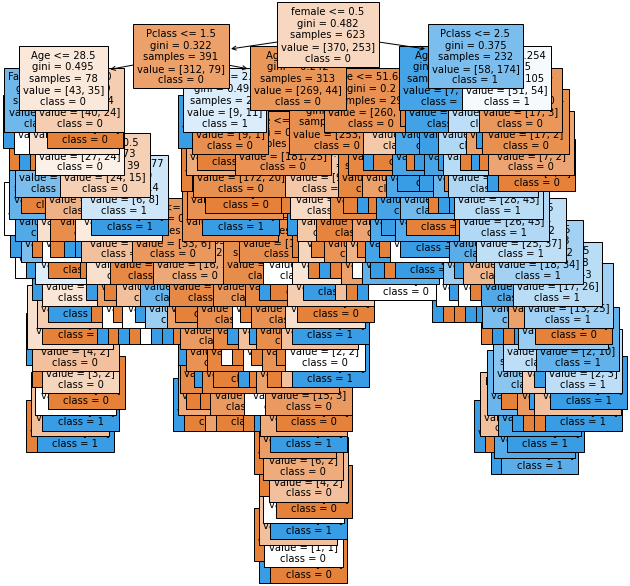

In [34]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10,10))
plot_tree = tree.plot_tree(dtree,feature_names = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female'], class_names = ['0','1'], filled =True, fontsize = 10)